# Traveling salesman problem

Finding the longest possible path through the graph. That is, not necessarily coming through all nodes, and not necessarily returning to the same node, but I want it to be as long as possible.

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [132]:
def make_graph(n=1, k=1):
    out = {}
    for i in range(n):
        out[i] = np.random.choice(range(n), np.random.randint(low=1, high=k+1), replace=False).tolist()
        if i in out[i]:
            out[i].remove(i)
            out[i].append((i+1) % n)
    for i in range(n):
        for j in out[i]:
            if i not in out[j]:
                out[j].append(i)
        out[i] = list(set(out[i]))
    return out

make_graph(7, 2)

{0: [4], 1: [6, 4], 2: [6, 3, 5], 3: [2], 4: [0, 1], 5: [2, 6], 6: [1, 2, 5]}

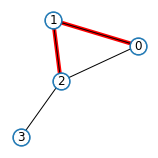

In [207]:
def plot_graph(g, path=None):
    gnx = nx.Graph()
    for i,val in g.items():
        for j in val:
            gnx.add_edge(i,j)
    pos = nx.kamada_kawai_layout(gnx)
    if path is not None:
        trail = nx.Graph()
        for i,_ in g.items():
            trail.add_node(i)
        for i in range(len(path)-1):
            trail.add_edge(path[i],path[i+1])
        nx.draw(trail, pos=pos, edge_color='red', width=4)
    nx.draw(gnx, node_size=200, pos=pos, node_color='white')
    nx.draw_networkx_labels(gnx, pos)
    
plt.figure(figsize=(2,2))
plot_graph({0:[1,2], 1:[0,2], 2:[0,1,3], 3:[2]}, [0,1,2])

[17, 11, 16, 8, 0, 5, 6, 1, 7, 18, 2, 3, 13, 9, 15, 4]


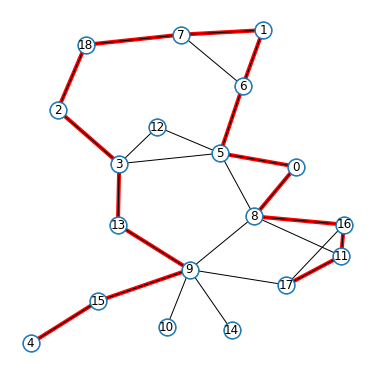

In [223]:
def travel(g, past=None, current=None):
    """Recursive graph-traveller."""
    if past is None:
        paths = [travel(g, set([]), node) for node,_ in g.items()]
        lengths = [(len(paths[i]),i) for i in range(len(paths))]
        best = sorted(lengths)[-1][1]
        return paths[best]
    possible_steps = set(g[current]) - past
    if not possible_steps: # Nowhere else to go
        return [current]
    paths = [travel(g, past|set([current]), node) for node in possible_steps]
    lengths = [(len(paths[i]),i) for i in range(len(paths))]
    best = sorted(lengths)[-1][1]
    return [current]+paths[best]

# np.random.seed(1)
g = make_graph(19,2)
tr = travel(g)
print(tr)
plt.figure(figsize=(5,5))
plot_graph(g, tr)